# Our Goal:
##  Determine the best neighborhood in Pittsburgh to be a successful criminal.


You could consider this reverse psychology, as maybe we’re just saying that in an effort to help people be aware of the areas most vulnerable to crime.  Or, you could see that we are broke college students. Everyone needs a job. We're not here to judge what career you go into, but we are judging where you should live if the criminal life chooses you. 

Anyways, our sub-metrics include: 

- the location of most dispatch calls 
- police gun seizures
- aggregate housing income

Each submetric has it's own metric and explanation that judges different qualities of a criminal's life to give an answer to what Pittsburgh's best neighborhood to be a criminal is.

# Conclusion

## What we found

From Metric 1, we were able to determine Mount Oliver Neighborhood would be the safest for a criminal to operate, since the fewest arrests were there.

From Metric 2,  we were able to determine Homewood South would be the best place for a successful criminal because then people will protect one another.

From Metric 3, we were able to determine Squirrel Hill South would be the most bountiful place for a criminal to operate.

### Using these three winning neighborhoods, we can compare the values we are using from each metric for each neighborhood to judge which neighborhood's stats are overall the best. 

Metric 1 (Number of Arrests):
 - Homewood South - 1866
 - Squirrel Hill South - 729
 

Metric 2 (Number of seizures since 2015):
- Mount Oliver Neighborhood - 4
- Squirrel Hill South- 47

Metric 3 (Aggregate household income, most to least):
- Mount Oliver Neighborhood - 13,962,700 dollars, ranked 75th out of 91
- Homewood South - 29,434,400 dollars, ranked 62nd out of 91

Just looking at this data here, it would be safe to assume that **Squirrel Hill South** would likely be the best neighborhood to be a criminal with it winning out metric 3, and taking second place with metrics 1 and 2.

# Dataset and Metric 1

In [1]:
import pandas as pd

In [2]:
# load in the Pittsburgh facility data file
data = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv", index_col="_id")

# look at ten random rows of data
data.sample(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
_id,,,,,,,,,,,,,,,,
43839,2022906,19264086,28.0,M,W,2019-12-31T15:10:00,"2500 Block Churchview AV Pittsburgh, PA 15227",903 Criminal Conspiracy. / 2705 Recklessy Enda...,"2500 Block Churchview AV Pittsburgh, PA 15227",Carrick,3,2904.0,4.0,3.0,-79.979007,40.385918
62133,2038462,21091650,54.0,M,B,2021-06-22T22:10:00,"2000 Block Brownsville RD Pittsburgh, PA 15210",2702 Aggravated Assault. / 3304(a)(5) CRIMINAL...,"2000 Block Brownsville RD Pittsburgh, PA 15210",Carrick,3,2901.0,4.0,3.0,-79.986868,40.394966
24132,2005160,18172838,25.0,F,W,2018-09-04T19:39:00,"E Sycamore ST & Arlington AV Pittsburgh, PA 15211",13(a)(16) Possession of Controlled Substance /...,"E Sycamore ST & Arlington AV Pittsburgh, PA 15211",Mount Washington,3,1914.0,3.0,5.0,-80.000559,40.430290
84795,2060526,23105197,38.0,M,W,2023-07-30T11:00:00,"600 Block 1st AV Pittsburgh, PA 15219","5126 Flight to Avoid Apprehension, Trial or Pu...","31st St BRDG & Penn AV Pittsburgh, PA 15201",Strip District,2,203.0,NaN,NaN,NaN,NaN
79263,2054572,22199304,41.0,M,B,2023-01-12T08:25:00,"900 Block 2nd AV Pittsburgh, PA 15219",2705 Recklessy Endangering Another Person. / 5...,"7000 Block Formosa WY Pittsburgh, PA 15208",Homewood South,5,1303.0,9.0,2.0,-79.902000,40.456149
79144,2054356,22193516,43.0,M,B,2022-12-19T11:07:00,"1400 Block Sloan AV Pittsburgh, PA 15221",2702 Aggravated Assault. / 2701(a)(1) Simple A...,"1400 Block Sloan AV Pittsburgh, PA 15221",Outside City,OSC,5599.0,NaN,NaN,NaN,NaN
62050,2038396,21099281,59.0,M,B,2021-06-06T15:10:00,"800 Block Inwood ST Pittsburgh, PA 15208",2701 Simple Assault.,"800 Block Inwood ST Pittsburgh, PA 15208",Homewood West,5,1207.0,9.0,2.0,-79.904981,40.458183
21132,2001308,18102433,34.0,M,B,2018-05-30T22:15:00,"Sylvania AV & Bernd WY Pittsburgh, PA 15210",3112 Traffic-Control Signals. / 13(a)(32) Para...,"Sylvania AV & Bernd WY Pittsburgh, PA 15210",Beltzhoover,3,1809.0,3.0,5.0,-79.998325,40.417461
68897,2044380,21228702,34.0,F,B,2021-12-26T11:56:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"5500 Block Centre AV Pittsburgh, PA 15232",Shadyside,4,709.0,8.0,2.0,-79.936452,40.456571


This here is 10 random examples of Pittsburgh arrests.  What we are looking for are the neighborhoods of where these arrests are made so now, we will filter accordingly.

Now, some of this data doesn't have a proper neighborhood, instead listing "NaN."  Let's filter out this data now.

In [3]:
data = data.dropna()
data.sample(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
_id,,,,,,,,,,,,,,,,
42598,2021844,19240609,17.0,M,B,2019-12-10T17:00:00,"1200 Block Liverpool ST Pittsburgh, PA 15233",3702 Robbery of Motor Vehicle. / 3921 Theft by...,"Nixon ST & Manhattan ST Pittsburgh, PA 15233",Manchester,1,2107.0,6.0,1.0,-80.028122,40.459535
14543,1992863,17134118,18.0,M,B,2017-11-13T09:45:00,"600 Block 1st AV Pittsburgh, PA 15219",2705 Recklessy Endangering Another Person. / 3...,"2900 Block Sheraden BL Pittsburgh, PA 15204",Sheraden,6,2018.0,2.0,5.0,-80.054058,40.453368
72445,2047427,22055921,53.0,M,W,2022-04-14T10:52:00,"2400 Block Allender AV Pittsburgh, PA 15220",2701 Simple Assault.,"2400 Block Allender AV Pittsburgh, PA 15220",Banksville,6,2023.0,2.0,5.0,-80.047237,40.403130
76787,2051359,22139653,48.0,M,B,2022-08-29T23:00:00,"5th AV & Vine ST Pittsburgh, PA 15219",13(a)(16) Possession of Controlled Substance /...,"5th AV & Vine ST Pittsburgh, PA 15219",Bluff,2,103.0,6.0,3.0,-79.984089,40.438506
13194,1991148,17184186,34.0,M,B,2017-09-24T20:18:00,"Brushton AV & Baxter ST Pittsburgh, PA 15221",2701 Simple Assault. / 2706 Terroristic Threats.,"1000 Block Brushton AV Pittsburgh, PA 15221",Homewood North,5,1301.0,9.0,2.0,-79.887664,40.456543
79356,2054688,22183052,22.0,M,B,2023-01-18T08:30:00,"900 Block 2nd AV Pittsburgh, PA 15219",2701 Simple Assault. / 3921(a) Theft by Unlawf...,"1600 Block Clarkton ST Pittsburgh, PA 15204",Windgap,6,2807.0,2.0,5.0,-80.075965,40.459367
39440,2019072,18237215,13.0,M,B,2019-09-20T07:25:00,"2700 Block S Grande BL Greensburg, PA 15601",903 Criminal Conspiracy. / 3928 Unauthorized U...,"200 Block N Negley AV Pittsburgh, PA 15206",East Liberty,5,1115.0,9.0,2.0,-79.930075,40.464544
7240,1983622,17060103,22.0,M,B,2017-04-03T23:03:00,"Dollar ST & Centre AV Pittsburgh, PA 15213",13(a)(32) Paraphernalia - Use or Possession,"3900 Block Bigelow BL Pittsburgh, PA 15213",North Oakland,4,507.0,6.0,3.0,-79.954183,40.452954
78549,2053498,22190429,49.0,M,B,2022-11-26T20:47:00,"600 Block 1st AV Pittsburgh, PA 15219",3928 Unauthorized Use of Automobile and Other ...,"Cedar AV & East Ohio ST Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.001697,40.453320


Now that we have filtered those out, let's get all the different names of each neighborhood.

In [4]:
print(data.columns)

Index(['PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME', 'ARRESTLOCATION',
       'OFFENSES', 'INCIDENTLOCATION', 'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE',
       'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')


This here is all the columns, however we are only focused on INCIDENTNEIGHBORHOOD, so I will get rid of the other values.

In [5]:
data.columns = ['PK', 'CCR',  'AGE', 'GENDER', 'RACE', 'ARRESTTIME', 'ARRESTLOCATION',
       'OFFENSES', 'INCIDENTLOCATION', 'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE',
       'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y']
data = data.drop(columns =  ['PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME', 'ARRESTLOCATION',
       'OFFENSES', 'INCIDENTLOCATION', 'INCIDENTZONE',
       'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'])

In [6]:
print(data)

            INCIDENTNEIGHBORHOOD
_id                             
1                     Bloomfield
3                       Westwood
4                 East Allegheny
5                Crafton Heights
6                     Greenfield
...                          ...
86192           Crawford-Roberts
86193           Crawford-Roberts
86194                   West End
86195              Highland Park
86196  Central Business District

[54643 rows x 1 columns]


In [7]:
data['INCIDENTNEIGHBORHOOD'].unique()

array(['Bloomfield', 'Westwood', 'East Allegheny', 'Crafton Heights',
       'Greenfield', 'Brookline', 'East Hills', 'Carrick',
       'Allegheny Center', 'South Side Flats', 'Sheraden',
       'East Carnegie', 'Golden Triangle/Civic Arena',
       'Point Breeze North', 'Perry South', 'Allentown', 'North Shore',
       'Marshall-Shadeland', 'Central Oakland', 'Middle Hill',
       'Strip District', 'Lincoln-Lemington-Belmar', 'Central Northside',
       'Troy Hill-Herrs Island', 'Highland Park', 'Homewood North',
       'Northview Heights', 'Brighton Heights', 'Hazelwood',
       'Bedford Dwellings', 'East Liberty', 'Elliott', 'Fineview',
       'Glen Hazel', 'Spring Hill-City View', 'Bluff', 'Beechview',
       'Manchester', 'Homewood West', 'Point Breeze', 'Homewood South',
       'Squirrel Hill South', 'Terrace Village', 'Upper Lawrenceville',
       'Arlington', 'South Side Slopes', 'Lower Lawrenceville',
       'Garfield', 'Lincoln Place', 'Larimer', 'Mount Washington',
       'C

This here is the number of total unqiue neighborhoods:

In [8]:
len(data['INCIDENTNEIGHBORHOOD'].unique())

98

Now I will now deterine the number of times each neighborhood shows up individually.

In [9]:
numbers_data = data['INCIDENTNEIGHBORHOOD'].value_counts()
print(numbers_data)

Central Business District    3804
South Side Flats             3158
Carrick                      2061
East Allegheny               2060
Homewood South               1866
                             ... 
Outside State                   8
Mt. Oliver Boro                 7
Troy Hill-Herrs Island          5
Outside County                  5
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64


Based on this data, I can infer that  Mt. Oliver Neighborhood would be the best place to be a successful criminal.  But I am going to map the data in case the areas around that neighborhood are "unsafe."

First I have to add the above column to the dataset, which I do here.

In [17]:
data["Incident Numbers"] = numbers_data
data.head()

,INCIDENTNEIGHBORHOOD,Incident Numbers
Central Business District,Bloomfield,3804
South Side Flats,Westwood,3158
Carrick,East Allegheny,2061
East Allegheny,Crafton Heights,2060
Homewood South,Greenfield,1866


So, we have the data we need.  Time to map it.

In [18]:
import geopandas
%matplotlib inline

In [19]:
data = data.drop_duplicates()
print(data)

                          INCIDENTNEIGHBORHOOD  Incident Numbers
Central Business District           Bloomfield              3804
South Side Flats                      Westwood              3158
Carrick                         East Allegheny              2061
East Allegheny                 Crafton Heights              2060
Homewood South                      Greenfield              1866
...                                        ...               ...
Outside State                             Hays                 8
Mt. Oliver Boro                  Outside State                 7
Troy Hill-Herrs Island          Chartiers City                 5
Outside County                 Mt. Oliver Boro                 5
Mt. Oliver Neighborhood         Outside County                 2

[98 rows x 2 columns]


Insert the Pittsburgh neighborhood map

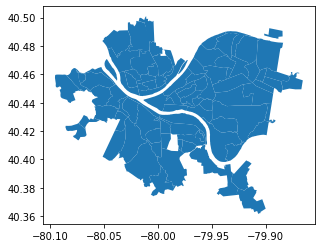

In [27]:
df = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
df.plot()

Merge the dataset with the map

In [31]:
# do the merge
arrest_map = df.merge(data, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
# look at the head to confirm it merged correctly
arrest_map[['hood','Incident Numbers','geometry']].head()

,hood,Incident Numbers,geometry
0,Central Oakland,955.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,188.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,157.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,224.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,862.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


Now I will display the neighborhoods via color

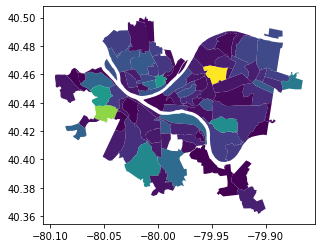

In [32]:
arrest_map.plot(column='Incident Numbers')

This doesn't seem to mean anything, so here the dataset will be framed accordingly.

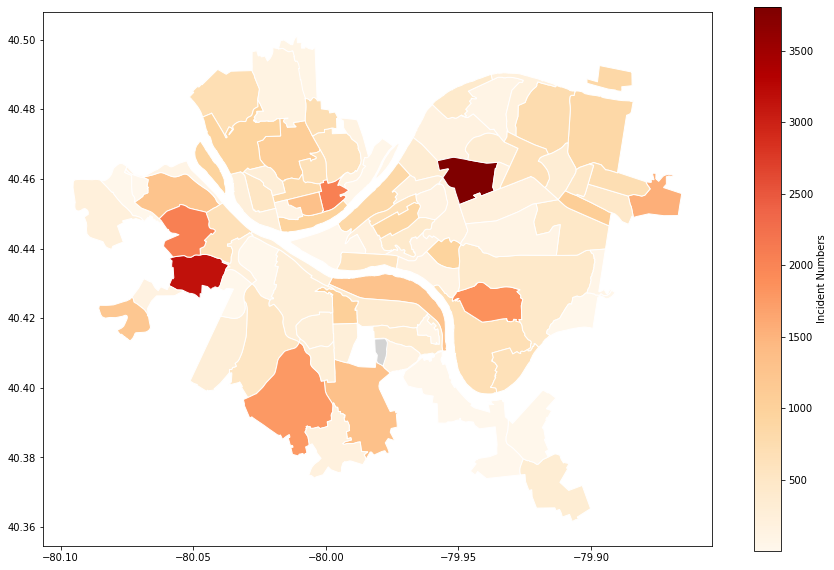

In [34]:
arrest_map.plot(column='Incident Numbers', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Incident Numbers"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Criminals would want to go to Mt. Oliver Neighborhood.

# Metric 2 - gun seizures

In [9]:
import pandas as pd 
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

gun_seizures = pd.read_csv("gun_seizures.csv", index_col="_id") # use the column named _id as the row index



neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

gun_seizures.head()

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,,,,,
1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


 I am measuring the **amount of gun seizures by neighborhood.** There are two ways you could think about this in the context of a place to be “the best criminal”, that being the neighborhood with the **most** or **least** gun seizures. 
 
Most gun seizures alludes to there being more criminals in that neighborhood, which would be nice if you're a young and lonely aspiring criminal. Plus, this makes that neighborhood actually have more crime, which would be good for our aspiring criminals. 

I will be finding the neighborhood with the most gun seizures. 


In [6]:
numseizures = gun_seizures.groupby("neighborhood")["total_count"].sum()

numseizures.sort_values(ascending=False)

neighborhood
Homewood South      345
South Side Flats    208
Homewood North      159
Brighton Heights    149
East Liberty        148
                   ... 
Mt. Oliver            4
Oakwood               4
Regent Square         4
Summer Hill           3
Swisshelm Park        3
Name: total_count, Length: 88, dtype: int64


each entry has a total guns seized column. I summed together the totals of these, grouping by neighborhood. This gives the sum of all of these counts based by neighborhood, in descending order. 

In [7]:


seizure_amount = dict()

for index, row in gun_seizures.iterrows():
    currenthood = row["neighborhood"]
    count = row["total_count"]
    
   
    if currenthood not in seizure_amount:
        seizure_amount[currenthood] = count 
    else:
        seizure_amount[currenthood] = count + seizure_amount[currenthood]
    
print(seizure_amount)

seizuredf = pd.DataFrame.from_dict(seizure_amount, orient="index", columns = ["amount"])
seizuredf = seizuredf.dropna()


seizuredf.tail(10)



{'Mount Oliver Borough': 9, 'Sheraden': 121, 'Terrace Village': 45, 'Brighton Heights': 149, nan: 1004, 'Westwood': 10, 'East Liberty': 148, 'Upper Lawrenceville': 20, 'Marshall-Shadeland': 148, 'Beechview': 101, 'East Hills': 137, 'Arlington': 40, 'Arlington Heights': 10, 'Mount Washington': 90, 'South Side Flats': 208, 'Hazelwood': 144, 'Homewood South': 345, 'Greenfield': 25, 'Bloomfield': 58, 'Beltzhoover': 46, 'Homewood North': 159, 'Upper Hill': 37, 'Perry South': 136, 'Lincoln-Lemington-Belmar': 136, 'Bedford Dwellings': 83, 'Homewood West': 61, 'Carrick': 148, 'Central Northside': 83, 'Chateau': 26, 'Fineview': 75, 'Chartiers City': 4, 'Larimer': 126, 'Polish Hill': 10, 'South Shore': 13, 'Highland Park': 42, 'Knoxville': 119, 'Lower Lawrenceville': 17, 'Allentown': 91, 'Spring Hill-City View': 77, 'Garfield': 95, 'Bluff': 58, 'Overbrook': 29, 'South Side Slopes': 40, 'Central Business District': 125, 'Banksville': 10, 'Perry North': 44, 'Friendship': 5, 'Crawford-Roberts': 57,

,amount
Oakwood,4
Windgap,15
Bon Air,12
North Shore,20
Lincoln Place,10
Mt. Oliver,4
West End,6
Esplen,10
Hays,8
Swisshelm Park,3


Does the same math operations, just saves in a dictionary, then to a pandas dataframe to be used for a map visualization 


neighborhood
Homewood South      345
South Side Flats    208
Homewood North      159
Brighton Heights    149
East Liberty        148
                   ... 
Mt. Oliver            4
Oakwood               4
Regent Square         4
Summer Hill           3
Swisshelm Park        3
Name: total_count, Length: 88, dtype: int64

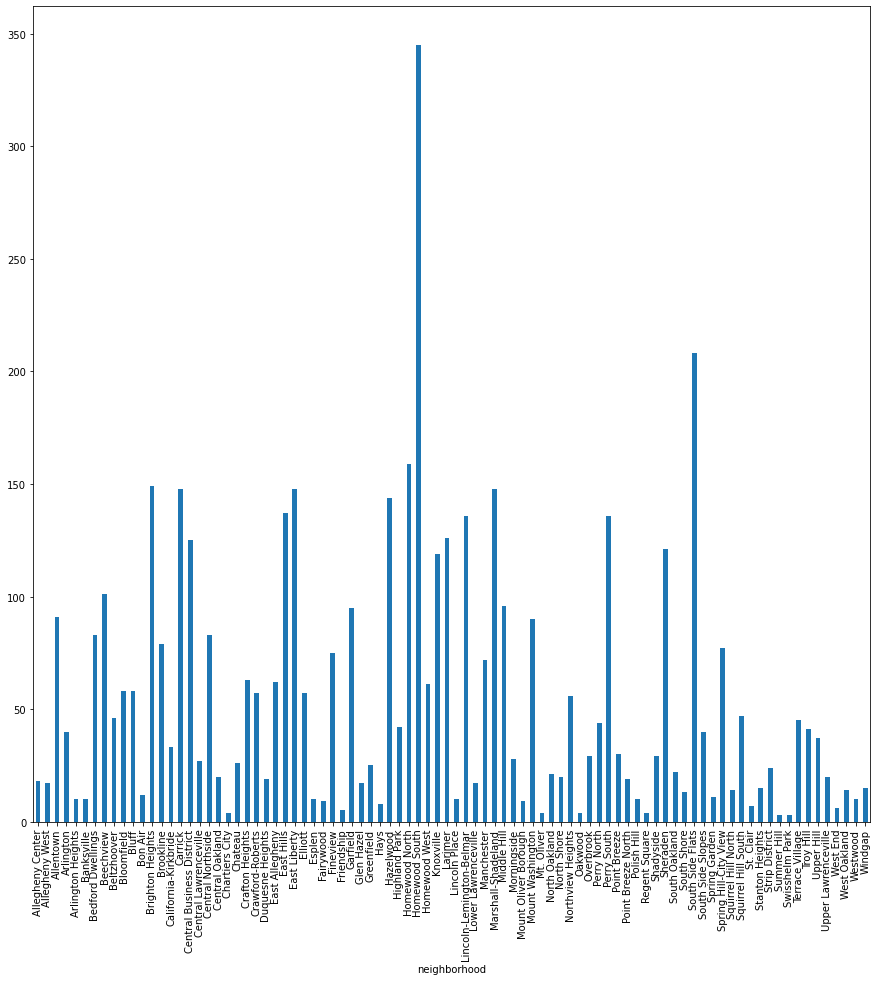

In [28]:
numseizures = gun_seizures.groupby("neighborhood")["total_count"].sum().plot(kind = "bar", figsize = (15,15))

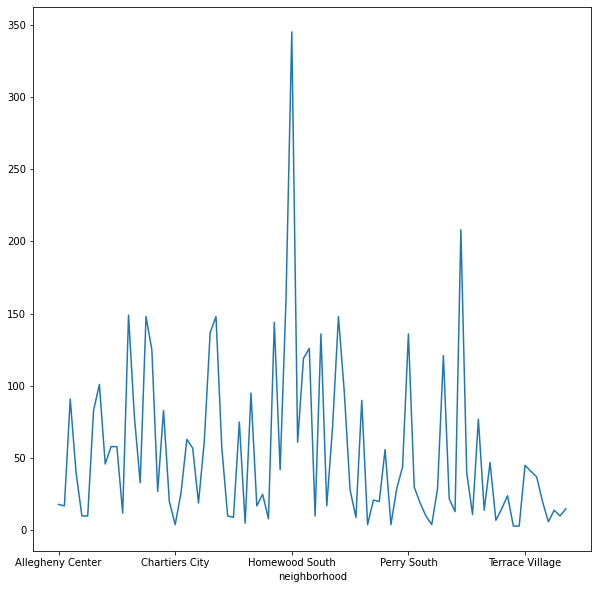

In [22]:
numseizures.plot(figsize=(10,10))

my data would seem to confirm that **Homewood South** overwhelmingly has the most firearm seizures, and the bar and regular graph support this conclusion. 

The graph visualization is a bit unruly, but does well at showing how much of a landslide this firearm value is than all the other neighborhoods.

# Metric 3

## Aggregate Household Income (2015)

In [46]:
import pandas as pd

This metric was chosen to help us decide on the most bountiful areas to be a criminal.  After all, if you're not doing much, you're not being very successful are you?

In [47]:
# load in the Pittsburgh facility data file
money = pd.read_csv("aggregate-household-income-in-the-past-12-months-in-2015-inflation-adjusted-dollars.csv", index_col="Id")

# look at 5 rows of data
money.head()

,Neighborhood,Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars),Margin of Error; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)
Id,,,
1,Allegheny Center,39947000,6437773
2,Allegheny West,23793300,22025939
3,Allentown,38303700,7490207.043
4,Arlington,35349900,6140662.723
5,Arlington Heights,2389600,1162393


Just like with the first one, let's check and get rid of the unnecessary columns we don't need.

In [48]:
print(money.columns)

Index(['Neighborhood',
       'Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)',
       'Margin of Error; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)'],
      dtype='object')


In [49]:
money.columns = ['Neighborhood',
       'Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)',
       'Margin of Error; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)']
money = money.drop(columns = ['Margin of Error; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)'])
print(money)

           Neighborhood  \
Id                        
1      Allegheny Center   
2        Allegheny West   
3             Allentown   
4             Arlington   
5     Arlington Heights   
..                  ...   
87  Upper Lawrenceville   
88             West End   
89         West Oakland   
90             Westwood   
91              Windgap   

   Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)  
Id                                                                                                  
1                                            39947000                                               
2                                            23793300                                               
3                                            38303700                                               
4                                            35349900                                               
5                                         

Okay, now we have the smallest amount of necessary columns.  From here we will arrange them from wealthiest to least wealthy.

In [50]:
money = money.dropna()

In [51]:
money_data = money.sort_values("Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)", ascending = True)
money_data.head(10)

,Neighborhood,Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)
Id,,
72,South Shore,-
22,Chateau,-
70,Sheraden,101081700
62,Perry North,104107900
7,Bedford Dwellings,10529100
15,California-Kirkbride,10718900
11,Bluff,11005200
43,Homewood West,11290000
29,East Liberty,115711700


That doesn't look right and on further inspection of the csv, we can see that the South Shore and Chateau neighborhoods have ** in place of a value.  Let's get rid of them, as they do not count.

In [52]:
money_data = money_data.drop(labels=[22,72], axis=0)

Now, because I didn't know what I was getting into with this dataset, there were A LOT of issues.  One of which being that the column I am attempting to sort, isn't classified as an int value (I think it might have been due to the ** ).

In [55]:
money_data["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"] = money_data["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"].astype(int)

Now when it is printed, it displays the neighborhood with the most wealth and the least.

In [54]:
money_data.sort_values('Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)', ascending = False)

,Neighborhood,Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)
Id,,
78,Squirrel Hill South,659886300
69,Shadyside,605635700
77,Squirrel Hill North,577467500
14,Brookline,366945900
64,Point Breeze,314958500
...,...,...
31,Esplen,5433900
36,Glen Hazel,4773300
79,St. Clair,3867600


Criminals would want to go to Squirrel Hill South.

# Conclusion

## What we found

From Metric 1, we were able to determine Mount Oliver Neighborhood would be the safest for a criminal to operate, since the fewest arrests were there.

From Metric 2,  we were able to determine Homewood South would be the best place for a successful criminal because then people will protect one another.

From Metric 3, we were able to determine Squirrel Hill South would be the most bountiful place for a criminal to operate.

### Using these three winning neighborhoods, we can compare the values we are using from each metric for each neighborhood to judge which neighborhood's stats are overall the best. 

Metric 1 (Number of Arrests):
 - Homewood South - 1866
 - Squirrel Hill South - 729
 

Metric 2 (Number of seizures since 2015):
- Mount Oliver Neighborhood - 4
- Squirrel Hill South- 47

Metric 3 (Aggregate household income, most to least):
- Mount Oliver Neighborhood - 13,962,700 dollars, ranked 75th out of 91
- Homewood South - 29,434,400 dollars, ranked 62nd out of 91

Just looking at this data here, it would be safe to assume that **Squirrel Hill South** would likely be the best neighborhood to be a criminal with it winning out metric 3, and taking second place with metrics 1 and 2.